<a href="https://colab.research.google.com/github/MochamadPhilliaWibowo/Machine-Learning-Class/blob/main/Tugas%20Week%202/Logistic%20Regression%20Model/Lecture_2_Logistic_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 2 Logistic Regression Model

Nama  : Mochamad Phillia Wibowo

NIM   : 1103204191

Kelas : Machine Learning (TK-44-G04)

# Import Modul

In [ ]:
# Mengimpor modul pandas dengan alias pd dan mengambil dataset dari google drive
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

# Melakukan normalisasi terhadap data yang kita miliki
from sklearn.preprocessing import StandardScaler

# Mengimpor modul train_test_split dari sklearn.model_selection
from sklearn.model_selection import train_test_split

#membuat model logistic regression
from sklearn import linear_model

#Untuk Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Memuat Dataset

In [ ]:
# Membaca dataset dari file CSV dan mengubahnya menjadi DataFrame 'data'
data = pd.read_csv('/content/drive/MyDrive/Dataset/Social_Network_Ads.csv')

In [ ]:
#melihat lima data teratas
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


# Pre-Processing

In [ ]:
#mengecek nilai kosong pada setiap atribut
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
#one hot encoding dengan pd.get_dummies()
data = pd.get_dummies(data)
data


,User ID,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,15624510,19,19000,0,0,1
1,15810944,35,20000,0,0,1
2,15668575,26,43000,0,1,0
3,15603246,27,57000,0,1,0
4,15804002,19,76000,0,0,1
...,...,...,...,...,...,...
395,15691863,46,41000,1,1,0
396,15706071,51,23000,1,0,1
397,15654296,50,20000,1,1,0
398,15755018,36,33000,0,0,1


In [ ]:
# Menentukan atribut yang akan digunakan sebagai fitur prediksi (X) dan label (y)
predictions = ['Age', 'EstimatedSalary', 'Gender_Female', 'Gender_Male']
X = data[predictions]  # Fitur prediksi
y = data['Purchased']  # Label


In [ ]:
# Membuat objek StandardScaler
scaler = StandardScaler()

# Menyesuaikan (fit) scaler dengan data fitur X
scaler.fit(X)

# Melakukan transformasi terhadap data fitur X
scaled_data = scaler.transform(X)

# Mengubah hasil transformasi menjadi DataFrame dengan nama kolom yang sesuai
scaled_data = pd.DataFrame(scaled_data, columns=X.columns)

# Menampilkan 5 baris pertama dari data yang telah dinormalisasi
scaled_data.head()


,Age,EstimatedSalary,Gender_Female,Gender_Male
0,-1.781797,-1.490046,-1.020204,1.020204
1,-0.253587,-1.460681,-1.020204,1.020204
2,-1.113206,-0.785290,0.980196,-0.980196
3,-1.017692,-0.374182,0.980196,-0.980196
4,-1.781797,0.183751,-1.020204,1.020204


In [ ]:
# Memisahkan data menjadi train set dan test set
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.2, random_state=1)



# Regresi

In [ ]:
#latih dengan fungsi fit()
model = linear_model.LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

# Evaluasi

In [ ]:
#uji akurasi model
print ("Akurasi : ",model.score(X_test, y_test))

Akurasi :  0.825


In [ ]:
# Menggabungkan fitur dan label untuk visualisasi
data_visual = data.copy()

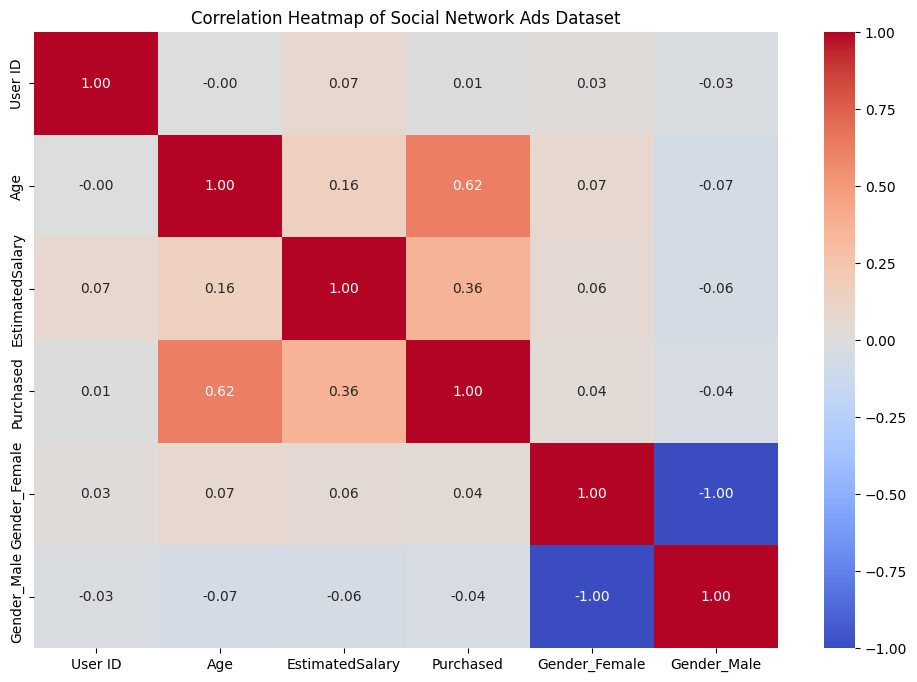

In [ ]:
# Visualisasi korelasi antar fitur
plt.figure(figsize=(12, 8))
sns.heatmap(data_visual.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Social Network Ads Dataset')
plt.show()

<ipython-input-37-38ea1109d56b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Purchased', data=data_visual, palette='Set2')


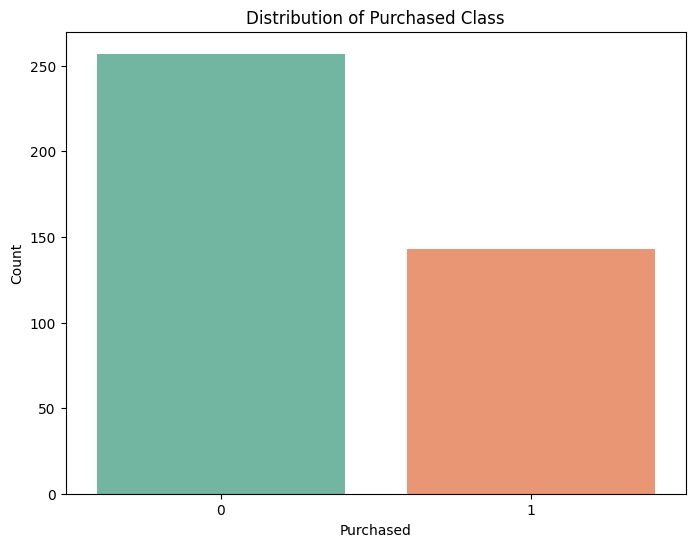

In [ ]:
# Visualisasi distribusi kelas target
plt.figure(figsize=(8, 6))
sns.countplot(x='Purchased', data=data_visual, palette='Set2')
plt.title('Distribution of Purchased Class')
plt.xlabel('Purchased')
plt.ylabel('Count')
plt.show()